In [1]:
import matplotlib.pyplot as plt
from itertools import permutations, combinations
from math import sqrt
from random import shuffle
import random
import numpy as np
import statistics
import pandas as pd
import seaborn as SNs

In [2]:
def initial_population(cities_list, n_population = 250):

    """
    Generating initial population of cities randomly selected from all
    possible permutations  of the given cities
    Input:
    1- Cities list
    2. Number of population
    Output:
    Generated lists of cities
    """

    population_perms = [random.sample(cities_list, len(cities_list)) for _ in range(n_population)]
    return population_perms

The above function would initialize the required number of individuals, which together form the algorithm's initial population. Please note that each individual in our case is a probable solution, which means that each individual is a sequence of cities without any repetition, as the traveling salesman should not pass any city twice while completing his or her journey. One individual example could be: [Gliwice, Cairo, Rome, Krakow, Paris, Alexandria, Berlin, Tokyo, Hong Kong, Rio]

In [3]:
def dist_two_cities(city_1, city_2):

    """
    Calculating the distance between two cities
    Input:
    1- City one name
    2- City two name
    Output:
    Calculated Euclidean distance between two cities
    """
    city_1=city_coords[city_1]
    city_2=city_coords[city_2]
    return np.sqrt(np.sum((np.array(city_1) - np.array(city_2))**2))
    

In [4]:
def total_dist_individual(individual):

    """
    Calculating the total distance traveled by individual,
    one individual means one possible solution (1 permutation)
    Input:
    1- Individual list of cities
    Output:
    Total distance traveled
    """

    total_dist = 0
    # Loop through each city in the individual's path
    for i in range(0,len(individual)):
       if(i==len(individual)-1):
         total_dist+=dist_two_cities(individual[i],individual[0])
       else:
         total_dist+=dist_two_cities(individual[i], individual[i+1])
    
    return total_dist

In [5]:
def fitness_prob(population):
    """
    Calculating the fitness probability
    Input:
    1- Population
    Output:
    Population fitness probability
    """
    fitness_values = [1 / total_dist_individual(ind) for ind in population]
    total_fitness = sum(fitness_values)
    population_fitness_probs = [f / total_fitness for f in fitness_values]
    return population_fitness_probs

In [6]:
def roulette_wheel(population, fitness_probs):
    """
    Implement a selection strategy based on proportionate roulette wheel
    Selection.
    Input:
    1- population
    2: fitness probabilities
    Output:
    selected individual
    """
    chosen = np.random.choice(range(len(population)), size=2, p=fitness_probs)
    return population[chosen[0]], population[chosen[1]]

In [7]:
def crossover(parent_1, parent_2):
    """
    Implement mating strategy using simple crossover between two parents
    Input:
    1- parent 1
    2- parent 2
    Output:
    1- offspring 1
    2- offspring 2
    """
    start, end = sorted(random.sample(range(len(parent_1)), 2))
    child = [-1] * len(parent_1)
    child[start:end] = parent_1[start:end]

    current_position = end
    for city in parent_2:
        if city not in child:
            if current_position >= len(parent_1):
                current_position = 0
            child[current_position] = city
            current_position += 1
    return child




In [8]:
def mutation(offspring):
    """
    Implement mutation strategy in a single offspring
    Input:
    1- offspring individual
    Output:
    1- mutated offspring individual
    """
    i, j = random.sample(range(len(offspring)), 2)
    offspring[i], offspring[j] = offspring[j], offspring[i]
    return offspring

In [9]:
n_population = 250
crossover_per = 0.8
mutation_per = 0.2
n_generations = 200

In [10]:
x = [0,3,6,7,15,10,16,5,8,1.5]
y = [1,2,1,4.5,-1,2.5,11,6,9,12]
cities_names = ["Gliwice", "Cairo", "Rome", "Krakow", "Paris",
                "Alexandria", "Berlin", "Tokyo", "Hong Kong", "Rio"]
city_coords = dict(zip(cities_names, zip(x, y)))

In [11]:
def run_ga(cities_names, n_population, n_generations,
           crossover_per, mutation_per):

    population = initial_population(cities_names, n_population)
    fitness_probs = fitness_prob(population)

    parents_list = []
    for i in range(0, int(crossover_per * n_population)):
        parents_list.append(roulette_wheel(population,
                                           fitness_probs))

    offspring_list = []
    for i in range(0,len(parents_list), 2):
        offspring_1, offspring_2 = crossover(parents_list[i],
                                             parents_list[i+1])

    #     print(offspring_1)
    #     print(offspring_2)
    #     print()

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_1 = mutation(offspring_1)
    #         print("Offspring 1 mutated", offspring_1)

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_2 = mutation(offspring_2)
    #         print("Offspring 2 mutated", offspring_2)


        offspring_list.append(offspring_1)
        offspring_list.append(offspring_2)

    mixed_offspring = parents_list + offspring_list

    fitness_probs = fitness_prob(mixed_offspring)
    sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:n_population]
    best_mixed_offsrping = []
    for i in best_fitness_indices:
        best_mixed_offsrping.append(mixed_offspring[i])


    for i in range(0, n_generations):
        # if (i%10 == 0):
            # print("Generation: ", i)

        fitness_probs = fitness_prob(best_mixed_offsrping)
        parents_list = []
        for i in range(0, int(crossover_per * n_population)):
            parents_list.append(roulette_wheel(best_mixed_offsrping,
                                               fitness_probs))

        offspring_list = []
        for i in range(0,len(parents_list), 2):
            offspring_1, offspring_2 = crossover(parents_list[i],
                                                 parents_list[i+1])

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_1 = mutation(offspring_1)

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_2 = mutation(offspring_2)

            offspring_list.append(offspring_1)
            offspring_list.append(offspring_2)


        mixed_offspring = parents_list + offspring_list
        fitness_probs = fitness_prob(mixed_offspring)
        sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
        best_fitness_indices = sorted_fitness_indices[0:int(0.8*n_population)]

        best_mixed_offsrping = []
        for i in best_fitness_indices:
            best_mixed_offsrping.append(mixed_offspring[i])

        old_population_indices = [random.randint(0, (n_population - 1))
                                  for j in range(int(0.2*n_population))]
        for i in old_population_indices:
#             print(i)
            best_mixed_offsrping.append(population[i])

        random.shuffle(best_mixed_offsrping)

    return best_mixed_offsrping

In [12]:
best_mixed_offsrping = run_ga(cities_names, n_population,
                              n_generations, crossover_per, mutation_per)

total_dist_all_individuals = []
for i in range(0, n_population):
    total_dist_all_individuals.append(total_dist_individual(best_mixed_offsrping[i]))

index_minimum = np.argmin(total_dist_all_individuals)
minimum_distance = min(total_dist_all_individuals)

shortest_path = best_mixed_offsrping[index_minimum]

The minimum_distance and the optimal solution is 61.137

The shortest path is: Cairo → Gliwice → Tokyo → Rio → Hong Kong → Berlin → Paris → Alexandria → Krakow → Rome → Cairo



##Optimum Solution Visualization

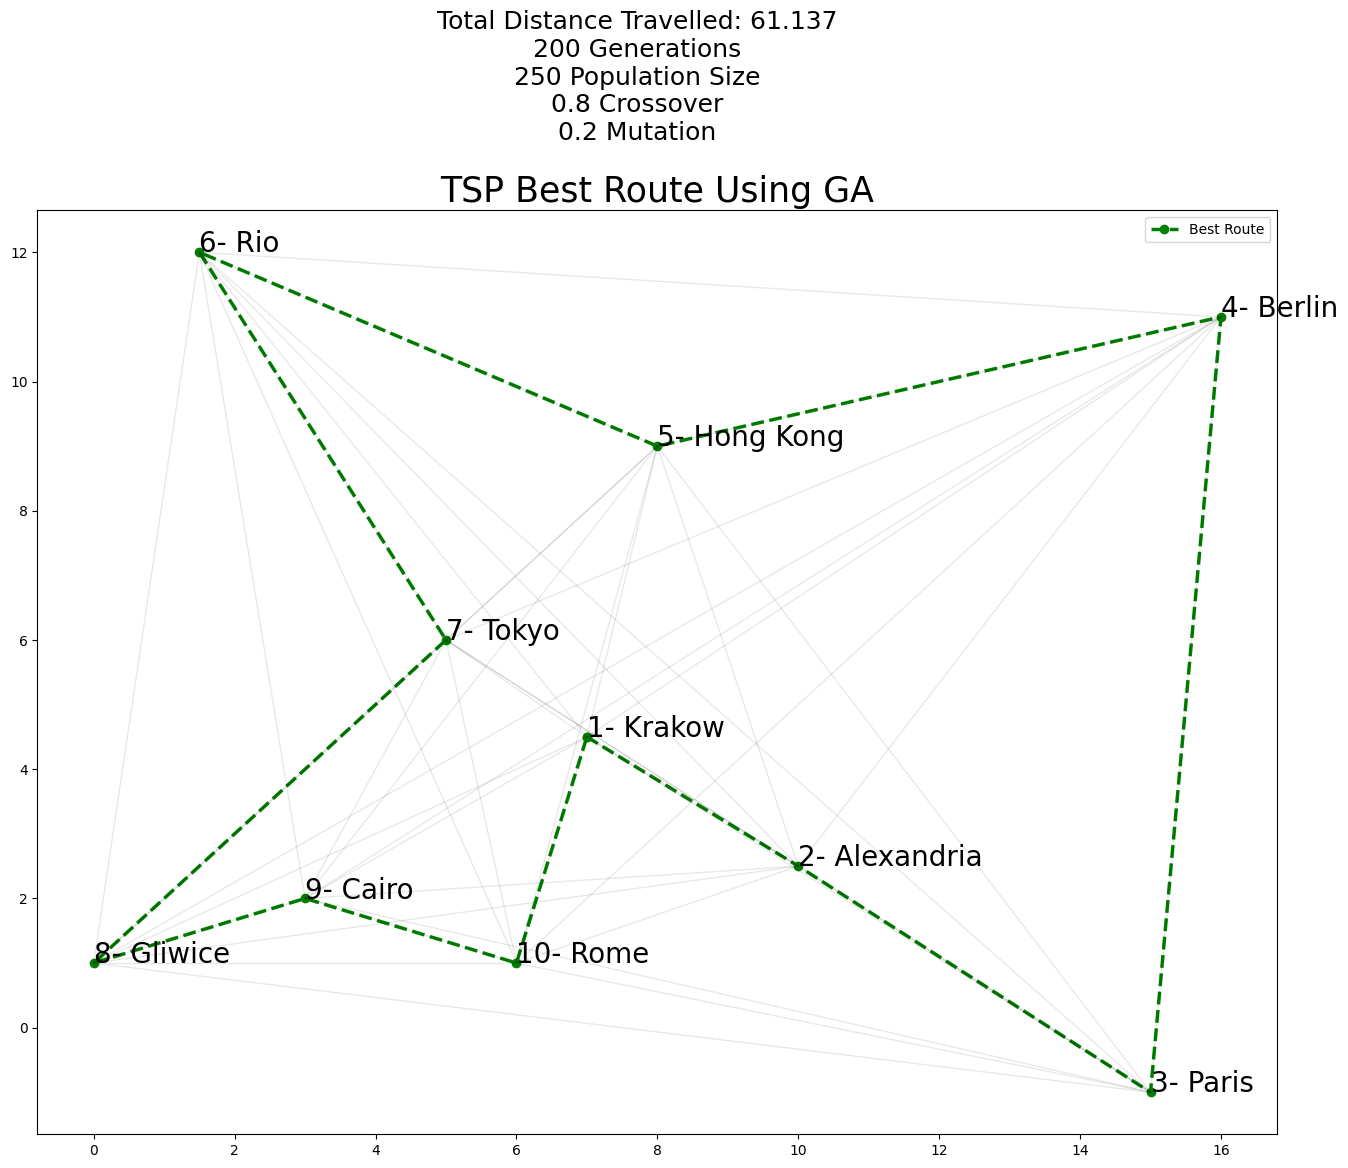

In [13]:
x_shortest = []
y_shortest = []
for city in shortest_path:
    x_value, y_value = city_coords[city]
    x_shortest.append(x_value)
    y_shortest.append(y_value)

x_shortest.append(x_shortest[0])
y_shortest.append(y_shortest[0])

fig, ax = plt.subplots()
ax.plot(x_shortest, y_shortest, '--go', label='Best Route', linewidth=2.5)
plt.legend()

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        ax.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)

plt.title(label="TSP Best Route Using GA",
          fontsize=25,
          color="k")

str_params = '\n'+str(n_generations)+' Generations\n'+str(n_population)+' Population Size\n'+str(crossover_per)+' Crossover\n'+str(mutation_per)+' Mutation'
plt.suptitle("Total Distance Travelled: "+
             str(round(minimum_distance, 3)) +
             str_params, fontsize=18, y = 1.047)

for i, txt in enumerate(shortest_path):
    ax.annotate(str(i+1)+ "- " + txt, (x_shortest[i], y_shortest[i]), fontsize= 20)

fig.set_size_inches(16, 12)
# plt.grid(color='k', linestyle='dotted')
plt.savefig('solution.png')
plt.show()